In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv('preprocessed.csv')
df.head()

/tmp/ipykernel_12197/2737237252.py:1: DtypeWarning: Columns (0: invoice) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('preprocessed.csv')


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,basket_size,basket_type,invoice_value,product_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,8,medium_retail,83.4,frequent
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail,81.0,frequent
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,8,medium_retail,81.0,frequent
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,8,medium_retail,100.8,frequent
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,8,medium_retail,30.0,frequent


In [3]:
df.columns

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country', 'basket_size', 'basket_type',
       'invoice_value', 'product_type'],
      dtype='str')

In [10]:
basket = (df.groupby(['invoice', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice'))
basket.head()

description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [16]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

In [18]:
basket_sets = basket.map(encode_units)

In [19]:
frequent_itemsets = fpgrowth(basket_sets, min_support=0.02, use_colnames=True)

In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [21]:
rules = rules.sort_values('confidence', ascending=False)

In [22]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                                      antecedents  \
43    frozenset({PINK REGENCY TEACUP AND SAUCER})   
45    frozenset({PINK REGENCY TEACUP AND SAUCER})   
40   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
41  frozenset({ROSES REGENCY TEACUP AND SAUCER })   
18    frozenset({SWEETHEART CERAMIC TRINKET BOX})   
12  frozenset({RED HANGING HEART T-LIGHT HOLDER})   
48           frozenset({JUMBO BAG PINK POLKADOT})   
51        frozenset({ALARM CLOCK BAKELIKE GREEN})   
42   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
39              frozenset({DOLLY GIRL LUNCH BOX})   

                                        consequents   support  confidence  \
43     frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.021308    0.833984   
45    frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.020060    0.785156   
40    frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.025525    0.763433   
41     frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.025525    0.725532   
18      frozenset({STRAWBERRY C

In [23]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
43,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.025550,0.033434,0.021308,0.833984,24.944224,1.0,0.020454,5.822139,0.985079,0.565563,0.828242,0.735649
45,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.025550,0.035181,0.020060,0.785156,22.317927,1.0,0.019162,4.490796,0.980238,0.493252,0.777322,0.677685
40,frozenset({GREEN REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.033434,0.035181,0.025525,0.763433,21.700443,1.0,0.024348,4.078417,0.986914,0.592357,0.754807,0.744482
41,frozenset({ROSES REGENCY TEACUP AND SAUCER }),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.035181,0.033434,0.025525,0.725532,21.700443,1.0,0.024348,3.521597,0.988701,0.592357,0.716038,0.744482
18,frozenset({SWEETHEART CERAMIC TRINKET BOX}),frozenset({STRAWBERRY CERAMIC TRINKET BOX}),0.036977,0.057636,0.026248,0.709852,12.316078,1.0,0.024117,3.247868,0.954084,0.383942,0.692106,0.582631


In [25]:
import numpy as np

# 1. Calculate Cosine Similarity (Null-Invariant)
# This measures the 'geometric' bond between two products
rules['cosine'] = rules['support'] / np.sqrt(rules['antecedent support'] * rules['consequent support'])

# 2. Calculate Kulczynski Measure (Null-Invariant)
# This is the average of Confidence(A->B) and Confidence(B->A)
# To avoid the join error, we can calculate it using Support and individual Supports:
# Formula: 0.5 * ( (P(A∩B)/P(A)) + (P(A∩B)/P(B)) )
rules['kulczynski'] = 0.5 * ( (rules['support'] / rules['antecedent support']) + 
                             (rules['support'] / rules['consequent support']) )

# 3. Calculate Imbalance Ratio (Bonus)
# Since you're a Store Manager, you want to know if the relationship is one-sided
# 0 means perfectly balanced; 1 means one product is way more popular than the other
rules['imbalance_ratio'] = (abs(rules['antecedent support'] - rules['consequent support'])) / \
                           (rules['antecedent support'] + rules['consequent support'] - rules['support'])

# Sort by Kulczynski to see the strongest null-invariant pairings
rules = rules.sort_values('kulczynski', ascending=False)

print(rules[['antecedents', 'consequents', 'support', 'kulczynski', 'cosine', 'imbalance_ratio']].head())

                                      antecedents  \
41  frozenset({ROSES REGENCY TEACUP AND SAUCER })   
40   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
43    frozenset({PINK REGENCY TEACUP AND SAUCER})   
42   frozenset({GREEN REGENCY TEACUP AND SAUCER})   
45    frozenset({PINK REGENCY TEACUP AND SAUCER})   

                                      consequents   support  kulczynski  \
41   frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.025525    0.744482   
40  frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.025525    0.744482   
43   frozenset({GREEN REGENCY TEACUP AND SAUCER})  0.021308    0.735649   
42    frozenset({PINK REGENCY TEACUP AND SAUCER})  0.021308    0.735649   
45  frozenset({ROSES REGENCY TEACUP AND SAUCER })  0.020060    0.677685   

      cosine  imbalance_ratio  
41  0.744241         0.040533  
40  0.744241         0.040533  
43  0.729047         0.209272  
42  0.729047         0.209272  
45  0.669108         0.236810  


In [26]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,cosine,imbalance_ratio
41,frozenset({ROSES REGENCY TEACUP AND SAUCER }),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.035181,0.033434,0.025525,0.725532,21.700443,1.0,0.024348,3.521597,0.988701,0.592357,0.716038,0.744482,0.744241,0.040533
40,frozenset({GREEN REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.033434,0.035181,0.025525,0.763433,21.700443,1.0,0.024348,4.078417,0.986914,0.592357,0.754807,0.744482,0.744241,0.040533
43,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({GREEN REGENCY TEACUP AND SAUCER}),0.025550,0.033434,0.021308,0.833984,24.944224,1.0,0.020454,5.822139,0.985079,0.565563,0.828242,0.735649,0.729047,0.209272
42,frozenset({GREEN REGENCY TEACUP AND SAUCER}),frozenset({PINK REGENCY TEACUP AND SAUCER}),0.033434,0.025550,0.021308,0.637313,24.944224,1.0,0.020454,2.686756,0.993114,0.565563,0.627804,0.735649,0.729047,0.209272
45,frozenset({PINK REGENCY TEACUP AND SAUCER}),frozenset({ROSES REGENCY TEACUP AND SAUCER }),0.025550,0.035181,0.020060,0.785156,22.317927,1.0,0.019162,4.490796,0.980238,0.493252,0.777322,0.677685,0.669108,0.236810


In [29]:
#Ir should be low
#Kulc should be high and they have smae product family too
rules.shape

(52, 16)

In [27]:
!pip install networkx

/usr/lib64/python3.14/pty.py:66: DeprecationWarning: This process (pid=12197) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s  0:00:00


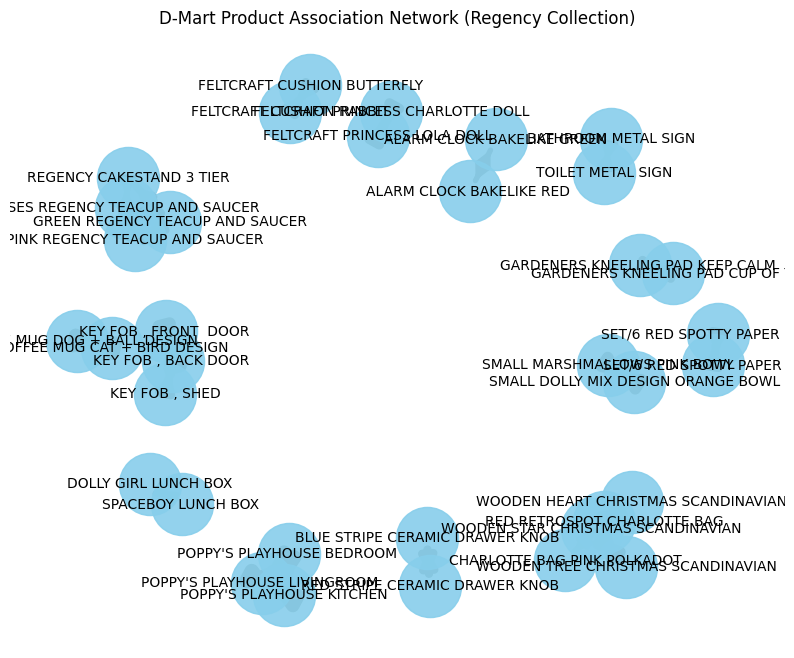

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# We filter for the strongest rules to keep the graph clean
strong_rules = rules[rules['kulczynski'] > 0.6].copy()

# Create a directed graph
G = nx.DiGraph()

for idx, row in strong_rules.iterrows():
    # Convert frozensets to strings for labeling
    ant = list(row['antecedents'])[0]
    con = list(row['consequents'])[0]
    
    # Add nodes and edges
    # We use 'lift' or 'kulczynski' to determine the thickness of the connection
    G.add_edge(ant, con, weight=row['lift'])

# Plotting the relationship map
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=1) 

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', alpha=0.9)


edges = G.edges()
weights = [G[u][v]['weight'] / 5 for u, v in edges] # scaled for visibility
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("D-Mart Product Association Network (Regency Collection)")
plt.axis('off')
plt.show()

In [ ]:

frequent_itemsets = fpgrowth(basket_sets, min_support=0.009, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

rules['kulczynski'] = 0.5 * ((rules['support'] / rules['antecedent support']) + 
                             (rules['support'] / rules['consequent support']))

rules['imbalance_ratio'] = (abs(rules['antecedent support'] - rules['consequent support'])) / \
                           (rules['antecedent support'] + rules['consequent support'] - rules['support'])

def flag_opportunity(row):
    if row['kulczynski'] > 0.6 and row['imbalance_ratio'] < 0.2:
        return 'Soulmates (Bundle Them)'
    if row['lift'] > 5 and row['imbalance_ratio'] > 0.5:
        return 'Impulse Buy (Cross-Sell)'
    return 'General Association'

rules['strategy'] = rules.apply(flag_opportunity, axis=1)

print(rules[['antecedents', 'consequents', 'kulczynski', 'imbalance_ratio', 'strategy']].head(15))


                                        antecedents  \
0               frozenset({JUMBO STORAGE BAG SUKI})   
1       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
2   frozenset({WHITE HANGING HEART T-LIGHT HOLDER})   
3       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
4       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
5                        frozenset({PARTY BUNTING})   
6             frozenset({REGENCY CAKESTAND 3 TIER})   
7       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
8              frozenset({JUMBO BAG RED RETROSPOT})   
9       frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
10          frozenset({PINK DOUGHNUT TRINKET POT })   
11      frozenset({STRAWBERRY CERAMIC TRINKET BOX})   
12       frozenset({ASSORTED COLOUR BIRD ORNAMENT})   
13  frozenset({WHITE HANGING HEART T-LIGHT HOLDER})   
14            frozenset({REGENCY CAKESTAND 3 TIER})   

                                        consequents  kulczynski  \
0       frozenset({STRAWBERRY CERAMIC TRINKET BOX}) 

In [41]:
rules.shape

(1274, 16)